In [17]:
FINAL_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\final_data.csv'
TFIDF_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\TFIDF.csv'


In [79]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure required NLTK packages are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)



# Text Preprocessing

In [8]:
df = pd.read_csv(FINAL_DATA_PATH)

In [11]:
df['Processed_Headline'] = df['Headline'].apply(preprocess_text)

In [13]:
# df

# Feature Extraction:

### TFIDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
tfidf_features = tfidf.fit_transform(df['Processed_Headline'])

# Convert to DataFrame for easier merging
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())


In [18]:
tfidf_df.to_csv(TFIDF_DATA_PATH , index=False)

TF IDF is a better and easier way to present the text data for text classification and ML models

### WORD2VEC

In [86]:
from gensim.models import KeyedVectors

# Download and Load pre-trained Word2Vec model (Google News vectors)
# https://drive.usercontent.google.com/download?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download&authuser=0
model_path = r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\data\raw\GoogleNews-vectors-negative300.bin'  # Update with the actual path
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)


In [105]:
text = 'i love you'

len([word2vec_model[word] for word in text if word in word2vec_model][5])

300

In [92]:
import numpy as np

def get_avg_word2vec_vector(text, model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found in the model
    
    return np.mean(word_vectors, axis=0)

# Apply this function to your DataFrame
df['Word2Vec_Vector'] = df['Processed_Headline'].apply(lambda x: get_avg_word2vec_vector(x, word2vec_model))


In [97]:
len(df['Word2Vec_Vector'][0])

300

# Sentiment Analysis

VADER is good for short texts and works well with financial news.

In [23]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [44]:
df.head()

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline
0,AMZN,2024-08-27,kelce brothers podcast privateequity vote late...,173.119995,-2.380005,-1,kelce brother podcast privateequity vote lates...
1,AMZN,2024-08-28,"4 key takeaways from nvidias earnings call , i...",170.800003,-2.319992,-1,4 key takeaway nvidias earnings call amazon al...
2,AMZN,2024-08-29,7 best fast money stocks to buy according to h...,172.119995,1.319992,1,7 best fast money stock buy according hedge fu...
3,AMZN,2024-08-30,amazon to hire covariant founders to expand wa...,178.500000,6.380005,1,amazon hire covariant founder expand warehouse...
4,DELL,2024-07-23,"3 top pc stocks to buy in july 2024 , dell sto...",125.849998,-2.445000,-1,3 top pc stock buy july 2024 dell stock buy al...


In [68]:
text =  df['Headline'][1]

In [69]:
text

'4 key takeaways from nvidias earnings call , is amazon alexa the best ai assistant in 2024 , forget amazon and tesla this nonmagnificent seven stock dwarfs their gains , google revamps controversial ai image generation tool after backlash , aws parallel computing service is now generally available designed to accelerate scientific discovery , big tech is under pressure today but so is the dow , nvidia stock weighs on tech sector ahead of earnings , labor day sales the best products to buy this weekend , top stock movers now super micro computer jm smucker nvidia and more , amazon focuses labor day sales event on backtoschool shoppers , analyst companies like amazoncom amzn now getting little bit of a bang on their ai spending , these are warren buffetts favorite artificial intelligence ai stocks , prediction these will be the 3 largest artificial intelligence ai companies by 2035 , prediction this unstoppable hypergrowth company will be the first 10 trillion stock hint its not nvidia 

In [70]:
sid.polarity_scores(text)

{'neg': 0.045, 'neu': 0.749, 'pos': 0.206, 'compound': 0.988}

In [71]:
# Apply VADER
df['Sentiment'] = df['Headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [76]:
df.head()

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline,Sentiment
0,AMZN,2024-08-27,kelce brothers podcast privateequity vote late...,173.119995,-2.380005,-1,kelce brother podcast privateequity vote lates...,0.8957
1,AMZN,2024-08-28,"4 key takeaways from nvidias earnings call , i...",170.800003,-2.319992,-1,4 key takeaway nvidias earnings call amazon al...,0.9880
2,AMZN,2024-08-29,7 best fast money stocks to buy according to h...,172.119995,1.319992,1,7 best fast money stock buy according hedge fu...,0.9564
3,AMZN,2024-08-30,amazon to hire covariant founders to expand wa...,178.500000,6.380005,1,amazon hire covariant founder expand warehouse...,0.9831
4,DELL,2024-07-23,"3 top pc stocks to buy in july 2024 , dell sto...",125.849998,-2.445000,-1,3 top pc stock buy july 2024 dell stock buy al...,0.6597


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2024-08-27'),
  Text(1, 0, '2024-08-28'),
  Text(2, 0, '2024-08-29'),
  Text(3, 0, '2024-08-30'),
  Text(4, 0, '2024-07-23'),
  Text(5, 0, '2024-07-24'),
  Text(6, 0, '2024-07-25'),
  Text(7, 0, '2024-07-26'),
  Text(8, 0, '2024-07-30'),
  Text(9, 0, '2024-07-31'),
  Text(10, 0, '2024-08-06'),
  Text(11, 0, '2024-08-07'),
  Text(12, 0, '2024-08-08'),
  Text(13, 0, '2024-08-09'),
  Text(14, 0, '2024-08-13'),
  Text(15, 0, '2024-08-14'),
  Text(16, 0, '2024-08-15'),
  Text(17, 0, '2024-08-16'),
  Text(18, 0, '2024-08-20'),
  Text(19, 0, '2024-08-21'),
  Text(20, 0, '2024-08-22'),
  Text(21, 0, '2024-08-23')])

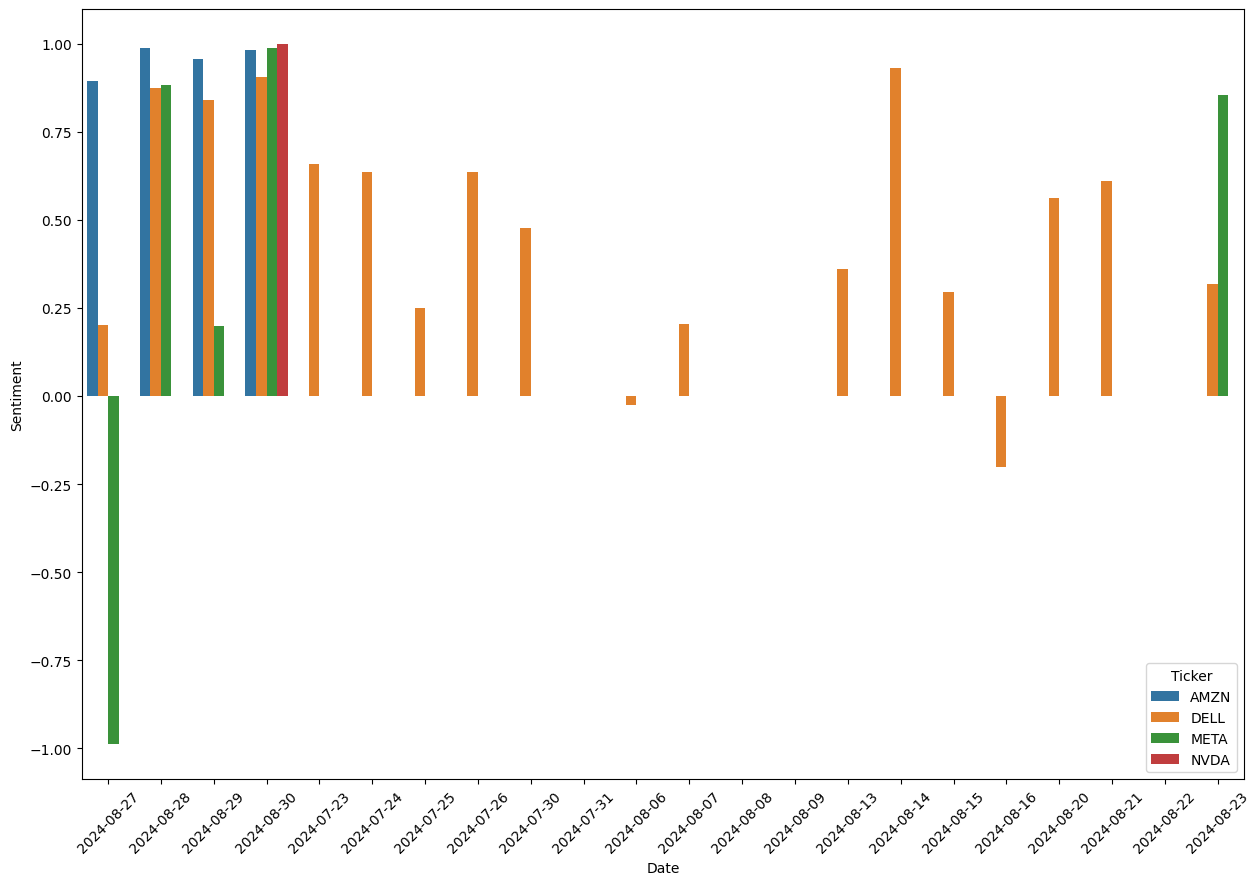

In [83]:
plt.figure(figsize=(15,10))
sns.barplot(df, x = 'Date' , y= 'Sentiment' , hue= 'Ticker')
plt.xticks(rotation = 45)

<Axes: >

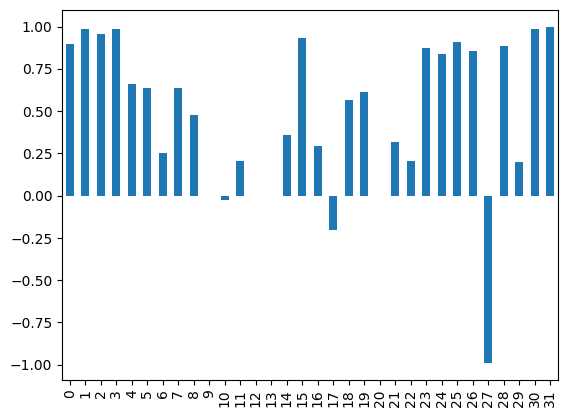

In [74]:
df['Sentiment'].plot(kind= 'bar')